                      west_sur   west_bot
date                                     
2015-02-02 12:00:00  10.078378  10.145714
2015-02-17 12:00:00   9.580000  10.100000
2015-05-03 12:00:00   8.339394   8.493103
2015-05-18 12:00:00   7.620000   7.977778
2015-08-01 12:00:00   7.341176   6.776471
2015-08-16 12:00:00   6.144828   5.640000
2015-08-31 12:00:00   6.300000   5.600000
2015-09-30 12:00:00   7.366667   7.130435
2015-10-15 12:00:00   6.677778   6.674074


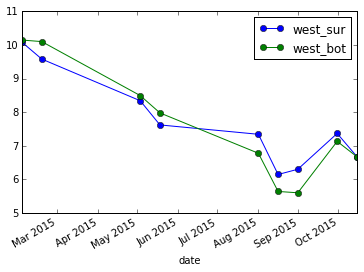

In [52]:
# coding: utf-8

% matplotlib inline

import pandas as pd
import datetime

lims = {'Salin':[30, 35],
        'Chl_a':[0, 8],
        'COD':[0, 3],
        'DO':[4, 11],
        'NH4_N':[0, 7],
        'NO3':[0, 9],
        'PO4_P':[0, 1],
        'ratio_NP':[0, 100]}

def csv2csv(infile, outfile):
    #parser = lambda mon, day: datetime.datetime(2012, int(float(mon)), int(float(day)), 12)
    #df = pd.read_csv(infile, date_parser=parser, parse_dates={'date':['mon','day']}, index_col='date')
    df = pd.read_csv(infile, parse_dates={'date':['mon','day']}, index_col='date')
    df = df.sort_index()
    upper = df[df.Lay == 'U']
    lower = df[df.Lay == 'B']
    u_mean = upper.resample('15D', how='mean', loffset=datetime.timedelta(days=-7.5))
    l_mean = lower.resample('15D', how='mean', loffset=datetime.timedelta(days=-7.5))
    u_mean = u_mean.dropna()
    l_mean = l_mean.dropna()
    DO = pd.concat([u_mean.DO, l_mean.DO], axis=1)
    if 'west' in outfile:
        DO.columns = ['west_sur','west_bot']
    elif 'south' in outfile:
        DO.columns = ['south_sur','south_bot']
    else:
        DO.columns = ['_sur','_bot']
    DO.plot(style='o-')

    print DO
    DO.to_csv(outfile, date_format='2012/%m/%d %H:%M')
    
infile = 'Z:/Database/SETO_KB.csv'
outfile = 'Y:/share/boundary/oxygen_west_seto_2001-2013_15D_raw.csv'
csv2csv(infile, outfile)

                     west_sur  west_bot
date                                   
2015-01-24 12:00:00  8.662500  9.050000
2015-02-08 12:00:00  8.655172  9.053846
2015-02-23 12:00:00  9.087500  8.340000
2015-04-24 12:00:00  6.770000  6.588889
2015-05-09 12:00:00  7.668966  6.782759
2015-05-24 12:00:00  7.500000  7.114286
2015-08-07 12:00:00  6.158333  5.970833
2015-08-22 12:00:00  6.258333  5.858333
2015-09-06 12:00:00  5.857143  5.200000
2015-10-06 12:00:00  6.733333  6.484848
2015-10-21 12:00:00  6.208333  5.966667
2015-11-05 12:00:00  6.200000  7.000000


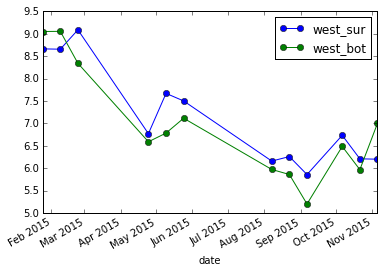

In [53]:
infile = 'Z:/Database/SETO_WY.csv'
outfile = 'Y:/share/boundary/oxygen_south_seto_2001-2013_15D_raw.csv'
csv2csv(infile, outfile)